In [1]:
# added necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#data readed and displayed first 10 values
df= pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# displayed some informations about columns and checked max value of amount column
df.info()
df.Amount.max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

np.float64(25691.16)

In [4]:
#checked total fraud data amount and dropped time column because we dont need it , that doesnt have any affect on our model
count_of_fraud_data= (df["Class"]==1).sum()
print(count_of_fraud_data)
print("% {:.2f}".format(count_of_fraud_data/df["Class"].count()*100)) # percent of fraud data ratio 
df= df.drop("Time",axis=1)


492
% 0.17


In [5]:
# normalized amount column because it have large values.
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [7]:
#y and x values identified and data splitted train and test set.
y= df["Class"]
x= df.drop(["Class"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size= 0.7,random_state=19)

In [8]:
#model learned.
model= LogisticRegression().fit(x_train,y_train)

In [9]:
#accuracy value
model.score(x_test,y_test)

0.9992158515033414

In [10]:
#each of pca column's mean calculated.
mean_comparison = df.groupby("Class").mean()
print(mean_comparison)


             V1        V2        V3        V4        V5        V6        V7  \
Class                                                                         
0      0.008258 -0.006271  0.012171 -0.007860  0.005453  0.002419  0.009637   
1     -4.771948  3.623778 -7.033281  4.542029 -3.151225 -1.397737 -5.568731   

             V8        V9       V10  ...       V20       V21       V22  \
Class                                ...                                 
0     -0.000987  0.004467  0.009824  ... -0.000644 -0.001235 -0.000024   
1      0.570636 -2.581123 -5.676883  ...  0.372319  0.713588  0.014049   

            V23       V24       V25       V26       V27       V28    Amount  
Class                                                                        
0      0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131  0.003437  
1     -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667  0.004757  

[2 rows x 29 columns]


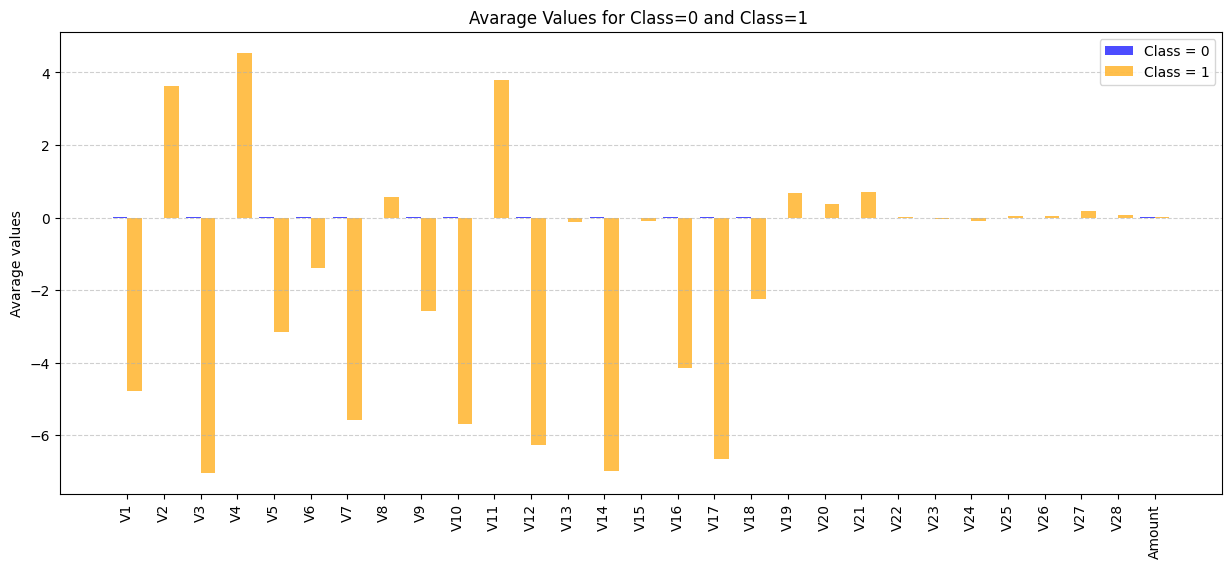

In [11]:
#its displayed on bar graphic
columns = mean_comparison.columns

class_0_means = mean_comparison.loc[0]
class_1_means = mean_comparison.loc[1]

bar_width = 0.4

x_indexes = np.arange(len(columns))

plt.figure(figsize=(15, 6))
plt.bar(x_indexes - bar_width/2, class_0_means, bar_width, label="Class = 0", color="blue", alpha=0.7)
plt.bar(x_indexes + bar_width/2, class_1_means, bar_width, label="Class = 1", color="orange", alpha=0.7)

plt.xticks(ticks=x_indexes, labels=columns, rotation=90)

plt.ylabel("Avarage values")
plt.title("Avarage Values for Class=0 and Class=1 ")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [12]:
#displayed precision, recall , f1 score and support values metrics for model evaluation
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]  
# Precision, Recall, F1-Score
report = classification_report(y_test, y_pred, digits=4)
print("🔹 Classification Report:\n", report)
#aur-roc score calculated (>.9 means model is good working)
auc_roc = roc_auc_score(y_test, y_prob)
print(f"🔹 AUC-ROC Score: {auc_roc:.4f}")

🔹 Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996     85293
           1     0.8879    0.6333    0.7393       150

    accuracy                         0.9992     85443
   macro avg     0.9436    0.8166    0.8695     85443
weighted avg     0.9992    0.9992    0.9992     85443

🔹 AUC-ROC Score: 0.9731


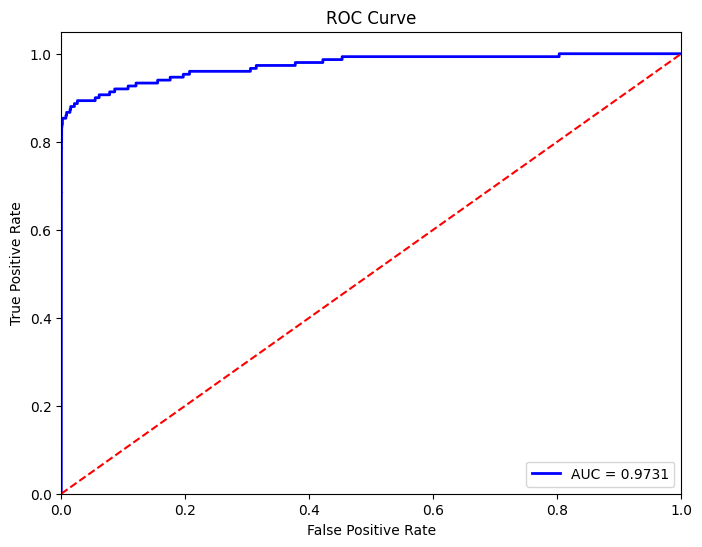

In [13]:
# plotting ROC curve it means that our model can select properly one and zeros.
#calculated false positive and true positive values.
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
